# kNN: k Nearest Neighbor for carbon, silicon, nitrogen, and aluminum isotopes

In [11]:
# Imports
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Read the CSV file

In [12]:
# Read the csv file into a pandas DataFrame
C_Si_N_Al = pd.read_csv('presolargrains_C_Si_N_Al.csv')
C_Si_N_Al.head()

,Type,carbon_12_13,nitrogen_14_15,aluminum_26_27,silicon_29_28,silicon_30_28
0,X,1581.00,116.0,0.0095,-684.0,-490.0
1,X,234.75,187.2,0.3327,-683.0,-501.0
2,X,140.00,97.0,0.0170,-653.0,-446.0
3,X,223.00,102.0,0.1140,-600.0,-459.0
4,X,1693.89,63.2,0.2364,-588.0,-605.0


In [13]:
# Set Type for y value
X = C_Si_N_Al.drop("Type", axis=1)
y = C_Si_N_Al['Type'].values.reshape(-1, 1)
target_names = ["AB", "C", "M", "N", "X", "Y", "Z"]
print(X.shape, y.shape)

(328, 5) (328, 1)


In [14]:
# Label Encoder and Transform
label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data['carbon_12_13'])
label_encoder.transform(data.carbon_12_13)
label_encoder.fit(data['silicon_29_28'])
label_encoder.transform(data.silicon_29_28)
label_encoder.fit(data['silicon_30_28'])
label_encoder.transform(data.silicon_30_28)
label_encoder.fit(data['nitrogen_14_15'])
label_encoder.transform(data.nitrogen_14_15)
label_encoder.fit(data['aluminum_26_27'])
label_encoder.transform(data.aluminum_26_27)
label_encoder.classes_


array([3.03000000e-05, 4.00000000e-05, 6.30000000e-05, 6.39000000e-05,
       7.00000000e-05, 7.47000000e-05, 8.00000000e-05, 1.00000000e-04,
       1.20000000e-04, 1.30000000e-04, 1.40000000e-04, 1.50000000e-04,
       1.70000000e-04, 1.80000000e-04, 1.90000000e-04, 2.00000000e-04,
       2.10000000e-04, 2.13000000e-04, 2.17000000e-04, 2.20000000e-04,
       2.28848000e-04, 2.30000000e-04, 2.40000000e-04, 2.60000000e-04,
       2.70000000e-04, 2.80000000e-04, 2.84000000e-04, 2.90000000e-04,
       3.00000000e-04, 3.10000000e-04, 3.20000000e-04, 3.26000000e-04,
       3.50000000e-04, 3.60000000e-04, 3.60981000e-04, 3.70000000e-04,
       3.80000000e-04, 3.90000000e-04, 4.00000000e-04, 4.07734000e-04,
       4.10000000e-04, 4.30000000e-04, 4.40000000e-04, 4.50000000e-04,
       4.56000000e-04, 4.70000000e-04, 4.75250000e-04, 4.80000000e-04,
       4.90000000e-04, 4.98000000e-04, 5.10000000e-04, 5.12514000e-04,
       5.40000000e-04, 5.50000000e-04, 5.70000000e-04, 6.00000000e-04,
      

## Create Train Test Split

In [15]:
# Separate data into train and test buckets
data_train, data_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Scale the data using MinMaxScalar

In [16]:
# MinMaxScalar
data_minmax = MinMaxScaler().fit(data_train)

data_train_minmax = data_minmax.transform(data_train)
data_test_minmax = data_minmax.transform(data_test)


## Find the best k value

In [17]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train_minmax, y_train_minmax)
    #train_score = knn.score(X_train_minmax, y_train_minmax)
    #test_score = knn.score(X_test_minmax, y_test_minmax)
    knn.fit(data_train_minmax, y_train)
    train_score = knn.score(data_train_minmax, y_train)
    test_score = knn.score(data_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.854
k: 3, Train/Test Score: 0.874/0.829
k: 5, Train/Test Score: 0.854/0.780
k: 7, Train/Test Score: 0.817/0.780
k: 9, Train/Test Score: 0.801/0.768
k: 11, Train/Test Score: 0.785/0.768
k: 13, Train/Test Score: 0.789/0.756
k: 15, Train/Test Score: 0.780/0.756
k: 17, Train/Test Score: 0.785/0.756
k: 19, Train/Test Score: 0.776/0.756


## Plot the train and test scores

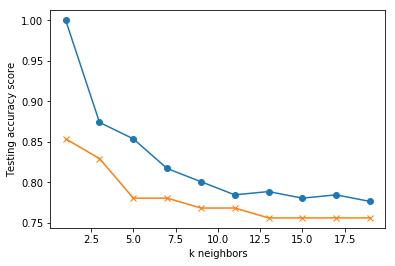

In [18]:
# Plot train scores in blue with marker 'o' and test scores in orange with marker 'x'
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

## Train the model and return the test score

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train_minmax, y_train)
print('k=1 Test Acc: %.3f' % knn.score(data_test_minmax, y_test))

k=1 Test Acc: 0.854


## Save the model

In [20]:
# Save model to file
filename = 'kNN_C_Si_N_Al.sav'
joblib.dump(knn, filename)

['kNN_C_Si_N_Al.sav']

## Summary:

### k Nearest Neighbor carbon, silicon, nitrogen, and aluminum (k=13): 85.4%